In [10]:
# coding: utf-8
# Team : Quality Management Center
# Author：Guo Zikun
# Email: gzk798412226@gmail.com
# Date ：2021/5/7 16:46
# Tool ：PyCharm
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import xgboost
from sklearn.metrics import accuracy_score
import operator
from matplotlib import pylab as plt
from pylab import *

def load_data():
    data = pd.read_csv(r'data/cancer/usingData/train/train(norm).csv')
    #前4/5作为训练集，后1/5作为测试集
    data_training = data[0:int(len(data)*3/5)]
    print("lenge of train data : ", len(data))
    data_test = data[int(len(data)*3/5):len(data)]
    #分割
    train_x = np.array(data_training.iloc[:, [i for i in range(data_training.shape[1]-1)]])
    train_y = np.array(data_training['Recurrence'])
    test_x = np.array(data_test.iloc[:, [i for i in range(data_test.shape[1]-1)]])
    test_y = np.array(data_test['Recurrence'])

    return train_x, train_y, test_x, test_y

def XGBoost():
    train_x, train_y, test_x, test_y = load_data()
    #训练
    clf=XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.05, max_depth=8, n_estimators=50)
    clf.fit(train_x, train_y)
    #测试
    result = clf.score(test_x, test_y)
    print("train: ", len(train_x), "test :", int(len(test_x)/10))
    print("accuracy :", result)
    
    return clf
    

if __name__ == '__main__':
    xgb_model = XGBoost()
    print(xgb_model)



lenge of train data :  5376
[21:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train:  3225 test : 215
accuracy : 0.5225476522547652
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


D:\software\Anoconda\envs\env_lime\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\software\Anoconda\envs\env_lime\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


lenge of train data :  5376
[16:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test : 3226
accuracy : 0.6816491010539367


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


ValueError: shape mismatch: objects cannot be broadcast to a single shape

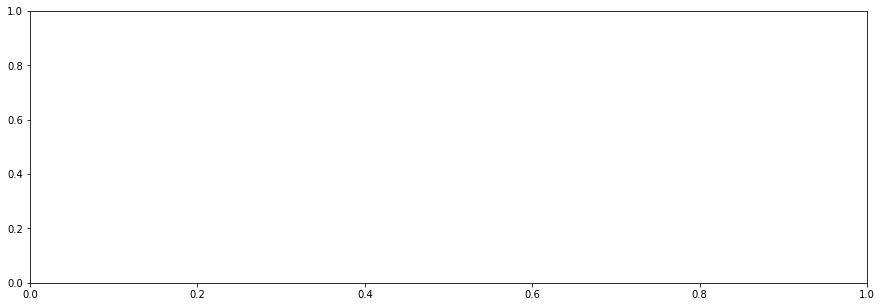

In [21]:
# 获取feature importance
cols = ['height_cm', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'age']

xgb_model = XGBoost()
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()

In [ ]:
"""用shap输出重要排名"""
import shap

train_x, train_y, test_x, test_y = load_data()
xgb_model = XGBoost()
shap_values = shap.TreeExplainer(xgb_model).shap_values(train_x)


shap.summary_plot(shap_values, train_x, plot_type="bar")
xgboost.plot_importance(xgb_model.model, max_num_features=10)

Calculation paper===========================================================================================
===